# **Crop Production using Random Forest Algorithm**

The data used here is taken from https://github.com/saeedkhaki92/CNN-RNN-Yield-Prediction.git


The code in the github explains about CNN-RNN implementation but here only the data is used and not the code.


The code below uses Random Forest Algorithm to predict production of corn.

In [ ]:
!git clone https://github.com/saeedkhaki92/CNN-RNN-Yield-Prediction.git

Cloning into 'CNN-RNN-Yield-Prediction'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 164 (delta 18), reused 0 (delta 0), pack-reused 131
Receiving objects: 100% (164/164), 5.15 MiB | 7.62 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [ ]:
cd /content/CNN-RNN-Yield-Prediction

/content/CNN-RNN-Yield-Prediction


In [ ]:
import pandas as pd
import numpy as np

The data available in csv format is loaded here

In [ ]:
dataset = pd.read_csv("/content/CNN-RNN-Yield-Prediction/corn_data_csv.csv")

Details about data:
The file contains yield performance, management, weather and soil data for corn between years 1980 and 2018 across 1176 counties within 13 states of America.

There are 6 weather components namely precepitation, solar radiation, snow water equivalent, maximum temperature, minimum temperature and vapour pressure of 52 weeks of each year.

The soil components include wet soil bulk density, dry bulk density,
clay percentage, upper limit of plant available water content,
lower limit of plant available water content, hydraulic
conductivity, organic matter percentage, pH, sand
percentage, and saturated volumetric water content
variables measured at depths 0–5, 5–10, 10–15, 15–30, 30–
45, 45–60, 60–80, 80–100, and 100–120 cm.

The management data contains the weekly cummulative percentage of planted fields within each state, starting from April of each year. The corn data includes 16 plantation date weeks.

4 soil components measured at surface is also present in the dataset.

In [ ]:
dataset.head()

,Loc_Id,Year,Yield,W11,W12,W13,W14,W15,W16,W17,W18,W19,W110,W111,W112,W113,W114,W115,W116,W117,W118,W119,W120,W121,W122,W123,W124,W125,W126,W127,W128,W129,W130,W131,W132,W133,W134,W135,W136,W137,...,S91,S92,S93,S94,S95,S96,S97,S98,S99,S910,S101,S102,S103,S104,S105,S106,S107,S108,S109,S1010,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,S_surface1,S_surface2,S_surface3,S_surface4
0,18.0,2018.0,190.3,0.011905,1.059524,0.821429,3.369048,0.214286,3.797619,0.476190,7.750000,2.011905,0.940476,0.726190,0.000000,2.309524,0.928571,2.678571,1.202381,0.000000,5.190476,4.166667,6.023810,5.559524,4.750000,10.226190,1.166667,13.607143,5.559524,1.619048,3.154762,2.892857,0.023810,0.869048,4.904762,1.904762,2.416667,10.250000,6.785714,0.000000,...,6.75,6.75,6.75,6.75,6.75,6.672222,8.354167,17.797917,23.554167,34.537963,46.833333,46.833333,46.833333,46.666667,45.916667,45.416667,44.916667,41.916667,39.416667,32.351852,0.0,0.0,0.0,0.0,4.0,28.0,42.0,16.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.816667,0.818167,0.82475,135.25
1,18.0,2017.0,204.1,0.035714,1.297619,6.559524,0.619048,0.035714,1.964286,0.000000,1.452381,3.571429,1.047619,0.654762,1.226190,9.666667,5.000000,3.142857,3.357143,3.797619,9.654762,6.583333,1.988095,5.297619,0.154762,0.404762,6.559524,4.952381,4.964286,1.500000,7.095238,16.357143,4.297619,0.392857,0.190476,3.535714,0.773810,2.011905,0.214286,0.000000,...,6.75,6.75,6.75,6.75,6.75,6.672222,8.354167,17.797917,23.554167,34.537963,46.833333,46.833333,46.833333,46.666667,45.916667,45.416667,44.916667,41.916667,39.416667,32.351852,0.0,0.0,1.0,5.0,28.0,29.0,2.0,10.0,14.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,1.816667,0.818167,0.82475,135.25
2,18.0,2016.0,215.6,0.000000,2.214286,0.142857,0.333333,2.083333,0.119048,0.547619,0.000000,0.654762,1.166667,4.273810,1.428571,4.857143,3.380952,0.666667,1.202381,2.916667,5.607143,10.023810,1.869048,2.535714,4.500000,1.392857,6.642857,4.178571,0.226190,6.416667,0.952381,2.119048,8.500000,3.821429,2.035714,2.952381,9.083333,7.952381,2.488095,0.928571,...,6.75,6.75,6.75,6.75,6.75,6.672222,8.354167,17.797917,23.554167,34.537963,46.833333,46.833333,46.833333,46.666667,45.916667,45.416667,44.916667,41.916667,39.416667,32.351852,0.0,0.0,2.0,10.0,30.0,24.0,12.0,5.0,6.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,1.816667,0.818167,0.82475,135.25
3,18.0,2015.0,182.9,3.071429,0.678571,0.119048,0.416667,4.238095,0.023810,0.000000,0.023810,1.333333,0.000000,0.000000,1.904762,0.166667,2.309524,5.964286,1.238095,3.023810,6.559524,4.916667,1.642857,5.690476,1.821429,1.952381,17.666667,5.214286,4.083333,4.738095,7.000000,3.583333,0.821429,0.559524,2.511905,5.238095,0.095238,4.869048,2.678571,1.940476,...,6.75,6.75,6.75,6.75,6.75,6.672222,8.354167,17.797917,23.554167,34.537963,46.833333,46.833333,46.833333,46.666667,45.916667,45.416667,44.916667,41.916667,39.416667,32.351852,0.0,0.0,0.0,0.0,15.0,16.0,38.0,19.0,6.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.816667,0.818167,0.82475,135.25
4,18.0,2014.0,194.1,2.250000,2.821429,0.880952,0.797619,1.297619,1.095238,1.476190,4.892857,1.190476,0.428571,0.523810,0.750000,1.095238,2.619048,3.678571,0.297619,3.809524,0.880952,3.559524,2.904762,2.428571,3.011905,2.309524,6.059524,12.607143,11.392857,3.702381,5.309524,0.202381,0.071429,5.761905,2.416667,0.000000,8.738095,2.309524,3.821429,6.238095,...,6.75,6.75,6.75,6.75,6.75,6.672222,8.354167,17.797917,23.554167,34.537963,46.833333,46.833333,46.833333,46.666667,45.916667,45.416667,44.916667,41.916667,39.416667,32.351852,0.0,0.0,0.0,1.0,4.0,27.0,11.0,35.0,6.0,11.0,3.0,2.0,0.0,0.0,0.0,0.0,1.816667,0.818167,0.82475,135.25


Attributes and labels are separated here. x is the array containing all the attributes and y contains the labels

In [ ]:
x = dataset.iloc[:,3:].values
y = dataset.iloc[:,2].values

Training and testing data are separated here using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

The range of data is not uniform. So the data is being scaled here using StandardScaler class.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

The data is being trained here using RandomForestRegressor class from sklearn.ensemble library. The parameter n_estimators defines the number of decision trees in the Random Forest and is set to 50 in this case.

The next line predicts the value of crop yield in the testing data x_test and stores in y_pred.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50,  random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

Here the error is found out using metrics library of sklearn.
Mean absolute error, mean squared error and root mean squared error is printed here.

In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The coefficient of determination (R^2) is printed here. The score is 0.9127 which is a very good prediction.

In [ ]:
metrics.r2_score(y_test, y_pred)

0.9127184528343927

In [ ]:
from sklearn import svm

In [ ]:
regressor_svm = svm.SVR(kernel='linear')
regressor_svm.fit(x_train, y_train)
pred_svm=regressor_svm.predict(x_test)

In [ ]:
regressor_svm.score(x_test, y_test)

0.9113661099846196

In [ ]:
metrics.r2_score(y_test, pred_svm)

0.9113661099846196

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [ ]:
linear_reg.fit(x_train, y_train)
linear_reg.score(x_test, y_test)

0.9249934701233827

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor(n_estimators = 500, random_state=0)
gr.fit(x_train, y_train)
gr.score(x_test, y_test)

In [ ]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=x,label=y)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.1, max_depth = 3, n_estimators = 500)
xg_reg.fit(X_train,Y_train)
preds = xg_reg.predict(X_test)
metrics.r2_score(Y_test, preds)

[16:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9316561438196429

In [ ]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test,preds))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, preds))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, preds)))

Mean Absolute Error: 7.495639658927917
Mean Squared Error: 94.66054147402151
Root Mean Squared Error: 9.729364905995741


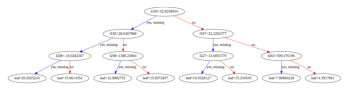

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [400, 100]
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
kneighbour = KNeighborsRegressor(n_neighbors=4)
kneighbour.fit(x_train, y_train)
pred = kneighbour.predict(x_test)
metrics.r2_score(y_test, pred)

0.8725372461648653

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', gamma='scale', coef0=10)
svr_lin = SVR(kernel='linear', gamma='auto')
svr_poly = SVR(kernel='poly',C=90, gamma='auto', degree=2, epsilon=2, coef0=5)

In [ ]:
svr_lin.fit(x_train, y_train)
svr_lin.score(x_test, y_test)

0.9113661099846196

In [ ]:
svr_poly.fit(x_train, y_train)
svr_poly.score(x_test, y_test)

0.9368535060968606

In [ ]:
svr_rbf.fit(x_train, y_train)
svr_rbf.score(x_test, y_test)

0.6170834254673079

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.kernel_ridge import KernelRidge

In [ ]:
kr = GridSearchCV(KernelRidge(kernel='linear', gamma=0.1), param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)})
kr

GridSearchCV(cv=None, error_score=nan,
             estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=0.1,
                                   kernel='linear', kernel_params=None),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
kr.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=0.1,
                                   kernel='linear', kernel_params=None),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
kr.best_params_

{'alpha': 1.0, 'gamma': 0.01}

In [ ]:
kr=KernelRidge(alpha=5, gamma=1)
krr.fit(x_train, y_train)
krr.score(x_test, y_test)

0.8359695014869284

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)

0.9222263183341628

In [ ]:
from sklearn.linear_model import RidgeCV
rdgcv=RidgeCV(alphas=[0.001,0.01,0.1,1,2,3])
rdgcv.fit(x_train, y_train)
rdgcv.score(x_test, y_test)

0.9235903678846651

In [ ]:
from sklearn.linear_model import LassoCV
lso=LassoCV()
lso.fit(x_train, y_train)
lso.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 381.19003373620217, tolerance: 342.9087298333335
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445.6028670251253, tolerance: 342.9087298333335
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 557.8367692271713, tolerance: 349.76550666500003
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incr

0.9165390755024481

In [ ]:
from sklearn.linear_model import LassoLarsCV
llcv=LassoLarsCV()
llcv.fit(x_train, y_train)
llcv.score(x_test, y_test)

0.9192359124941959

In [ ]:
from sklearn.linear_model import SGDRegressor
sdg=SGDRegressor(alpha=0.9, penalty='l1', max_iter=500, random_state=0, power_t=0.25, shuffle=False)
sdg.fit(x_train, y_train)
sdg.score(x_test, y_test)

0.8332693513855806

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
ada=AdaBoostRegressor(n_estimators=150, learning_rate=1.5, base_estimator=DecisionTreeRegressor(max_depth=10))
ada.fit(x_train, y_train)
ada.score(x_test, y_test)

0.9150259042942315

In [ ]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train, label=y_train)
param = {'num_leaves':150, 'objective':'regression','max_depth':3,'learning_rate':0.4,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']
model = lgb.train(param, train_data, 200)
ypred=model.predict(x_test)
metrics.r2_score(ypred,y_test)

0.9115676610223308